In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
ml=["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for i in ml:
    df[i].replace(0,np.nan,inplace=True)
    df[i].fillna(df[i].mean(),inplace=True)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
x=df.iloc[:,1:-1]
x

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [10]:
y=df["Outcome"]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
#standarization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [12]:
# Applying train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20,random_state=1)

In [13]:

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)


knn.fit(xtrain,ytrain)


ypred=knn.predict(xtest)

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(ytest,ypred)

0.7142857142857143

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[77, 22],
       [22, 33]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        99
           1       0.60      0.60      0.60        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



In [19]:
ac_list=[]

for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    ac_list.append(ac)

In [20]:
print(ac_list)

[0.6818181818181818, 0.7337662337662337, 0.7142857142857143, 0.7597402597402597, 0.7792207792207793, 0.7727272727272727, 0.8051948051948052, 0.7922077922077922, 0.8051948051948052, 0.8116883116883117, 0.8181818181818182, 0.8116883116883117, 0.8441558441558441, 0.8246753246753247, 0.8506493506493507, 0.8116883116883117, 0.8571428571428571, 0.8051948051948052, 0.8571428571428571, 0.8376623376623377, 0.8441558441558441, 0.8311688311688312, 0.8376623376623377, 0.8376623376623377, 0.8571428571428571, 0.8376623376623377, 0.8376623376623377, 0.8246753246753247, 0.8376623376623377]


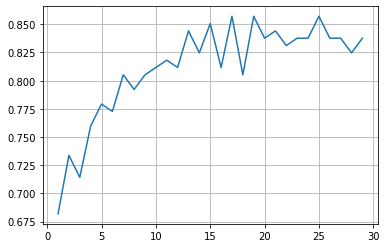

In [21]:
plt.plot(range(1,30),ac_list)
plt.grid()

In [22]:

knn=KNeighborsClassifier(n_neighbors=17)


knn.fit(xtrain,ytrain)


ypred=knn.predict(xtest)

In [23]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        99
           1       0.87      0.71      0.78        55

    accuracy                           0.86       154
   macro avg       0.86      0.82      0.84       154
weighted avg       0.86      0.86      0.85       154

